# **Question 1: Binary Classification with Custom Naive Bayes**

## Objective: The objective of this assignment is to develop a binary classification model using the Naive Bayes algorithm. Students will gain hands-on experience in data loading, preprocessing, visualization, and model evaluation, applying statistical fundamentals to create an effective classifier.

In [1]:
# Cell 1
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install -U ucimlrepo 
# %pip install -U imbalanced-learn


In [2]:
# Cell 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# Cell 3

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **Data Loading and Preprocessing**

## **Step 1 - Load the dataset from the provided URL into a suitable data structure (like a pandas Data Frame).** 

In [4]:
# Cell 4

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
  
# metadata 
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables) 


{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'tit

In [5]:
X_backup = X.copy()
y_backup = y.copy()

In [6]:
# Cell 5

# Display information about the dataset
print("\nDataset Information:")
print(X.info())

print("\nTarget Variables Information:")
print(y.info())

print("First few rows of Features:")
print(X.head())

print("\nFirst few rows of Target:")
print(y.head())

all_columns = X.columns.tolist()
print("\nList of All Columns:")
print(all_columns)



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 111 entries, AGE to TRENT_S_n
dtypes: float64(110), int64(1)
memory usage: 1.4 MB
None

Target Variables Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   FIBR_PREDS  1700 non-null   int64
 1   PREDS_TAH   1700 non-null   int64
 2   JELUD_TAH   1700 non-null   int64
 3   FIBR_JELUD  1700 non-null   int64
 4   A_V_BLOK    1700 non-null   int64
 5   OTEK_LANC   1700 non-null   int64
 6   RAZRIV      1700 non-null   int64
 7   DRESSLER    1700 non-null   int64
 8   ZSN         1700 non-null   int64
 9   REC_IM      1700 non-null   int64
 10  P_IM_STEN   1700 non-null   int64
 11  LET_IS      1700 non-null   int64
dtypes: int64(12)
memory usage: 159.5 KB
None
First few rows of Features:
    AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_

In [7]:
# Cell 6

# Get the statistical summary before changes
print("Statistical summary before changes:")
print(X_backup.describe())

additional_features = ['FIBR_PREDS', 'OTEK_LANC', 'REC_IM', 'A_V_BLOK', 'RAZRIV', 'DRESSLER']

# Make the changes to X and y
# X.loc[:, additional_features] = y[additional_features]   # should run this only once
# y = y['ZSN']

# Get the statistical summary after changes
print("\nStatistical summary after changes:")
print(X.describe())
print(X.head())

Statistical summary before changes:
               AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  ...  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000  ...   
mean      1.160703   0.37500     1.393258     0.033688     3.340220  ...   
std       0.801400   0.48752     1.088803     0.180478     3.098646  

In [8]:
X_backup.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [9]:
X.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [10]:
MI_dataset = pd.concat([X, y], axis=1)
MI_dataset.to_csv('MI_dataset.csv', index=False)

file_name = 'MI_dataset.csv'
if os.path.exists(file_name):
    print(f"File '{file_name}' saved successfully.")
else:
    print(f"There was an issue saving the file '{file_name}'.")


File 'MI_dataset.csv' saved successfully.


In [11]:
MI_dataset.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 123 columns):
 #    Column         Dtype  
---   ------         -----  
 0    AGE            float64
 1    SEX            int64  
 2    INF_ANAM       float64
 3    STENOK_AN      float64
 4    FK_STENOK      float64
 5    IBS_POST       float64
 6    IBS_NASL       float64
 7    GB             float64
 8    SIM_GIPERT     float64
 9    DLIT_AG        float64
 10   ZSN_A          float64
 11   nr_11          float64
 12   nr_01          float64
 13   nr_02          float64
 14   nr_03          float64
 15   nr_04          float64
 16   nr_07          float64
 17   nr_08          float64
 18   np_01          float64
 19   np_04          float64
 20   np_05          float64
 21   np_07          float64
 22   np_08          float64
 23   np_09          float64
 24   np_10          float64
 25   endocr_01      float64
 26   endocr_02      float64
 27   endocr_03      float64
 28   zab_leg_01     f

## **Step 2 - Clean the data by handling missing values, and normalizing numerical features as needed.**

In [12]:
# Cell 8

# Load the CSV file into a DataFrame
file_name = 'MI_dataset.csv'
data = pd.read_csv(file_name)

all_columns = data.columns
missing_dict = {col: data[col].isnull().sum() for col in all_columns}

# summary of missing values
print("Summary of missing values in each column:")
for col, count in missing_dict.items():
    if count >= 0:
        print(f"{col}: {count} missing values")


Summary of missing values in each column:
AGE: 8 missing values
SEX: 0 missing values
INF_ANAM: 4 missing values
STENOK_AN: 106 missing values
FK_STENOK: 73 missing values
IBS_POST: 51 missing values
IBS_NASL: 1628 missing values
GB: 9 missing values
SIM_GIPERT: 8 missing values
DLIT_AG: 248 missing values
ZSN_A: 54 missing values
nr_11: 21 missing values
nr_01: 21 missing values
nr_02: 21 missing values
nr_03: 21 missing values
nr_04: 21 missing values
nr_07: 21 missing values
nr_08: 21 missing values
np_01: 18 missing values
np_04: 18 missing values
np_05: 18 missing values
np_07: 18 missing values
np_08: 18 missing values
np_09: 18 missing values
np_10: 18 missing values
endocr_01: 11 missing values
endocr_02: 10 missing values
endocr_03: 10 missing values
zab_leg_01: 7 missing values
zab_leg_02: 7 missing values
zab_leg_03: 7 missing values
zab_leg_04: 7 missing values
zab_leg_06: 7 missing values
S_AD_KBRIG: 1076 missing values
D_AD_KBRIG: 1076 missing values
S_AD_ORIT: 267 missin

In [13]:
# Cell 9

# Load the CSV file into a DataFrame
file_name = 'MI_dataset.csv'
data = pd.read_csv(file_name)

# Get all columns
all_columns = data.columns

missing_dict_before = {col: data[col].isnull().sum() for col in all_columns}

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

missing_dict_after = {col: data_imputed[col].isnull().sum() for col in all_columns}

# summary of missing values before imputation
print("Before Imputation:")
print("Summary of missing values in each column:")
for col, count in missing_dict_before.items():
    if count >= 0:
        print(f"{col}: {count} missing values")

# summary of missing values after imputation
print("\nAfter Imputation:")
print("Summary of missing values in each column:")
for col, count in missing_dict_after.items():
    if count >= 0:
        print(f"{col}: {count} missing values")


Before Imputation:
Summary of missing values in each column:
AGE: 8 missing values
SEX: 0 missing values
INF_ANAM: 4 missing values
STENOK_AN: 106 missing values
FK_STENOK: 73 missing values
IBS_POST: 51 missing values
IBS_NASL: 1628 missing values
GB: 9 missing values
SIM_GIPERT: 8 missing values
DLIT_AG: 248 missing values
ZSN_A: 54 missing values
nr_11: 21 missing values
nr_01: 21 missing values
nr_02: 21 missing values
nr_03: 21 missing values
nr_04: 21 missing values
nr_07: 21 missing values
nr_08: 21 missing values
np_01: 18 missing values
np_04: 18 missing values
np_05: 18 missing values
np_07: 18 missing values
np_08: 18 missing values
np_09: 18 missing values
np_10: 18 missing values
endocr_01: 11 missing values
endocr_02: 10 missing values
endocr_03: 10 missing values
zab_leg_01: 7 missing values
zab_leg_02: 7 missing values
zab_leg_03: 7 missing values
zab_leg_04: 7 missing values
zab_leg_06: 7 missing values
S_AD_KBRIG: 1076 missing values
D_AD_KBRIG: 1076 missing values
S_

## **Step 3 - Feature Selection and Split the dataset into training and testing sets**

### SelectKBest Method 

In [14]:
# Cell 11

file_name = 'MI_dataset.csv'
data = pd.read_csv(file_name)

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop('ZSN', axis=1)  
y = data_imputed['ZSN'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better convergence in logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_features = 20  

# Apply SelectKBest with ANOVA F-value as the scoring function
selector = SelectKBest(score_func=f_classif, k=num_features)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

# Use the selected features for training a model 
model = LogisticRegression(max_iter=1000) 
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with {num_features} selected features: {accuracy:.2f}")

# Get the names of the selected features
print("Selected Features:")
print(selected_features)


Accuracy with 20 selected features: 0.78
Selected Features:
Index(['AGE', 'SEX', 'ZSN_A', 'nr_04', 'np_09', 'endocr_01', 'zab_leg_01',
       'K_SH_POST', 'MP_TP_POST', 'lat_im', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
       'n_r_ecg_p_06', 'ALT_BLOOD', 'NA_R_2_n', 'NA_R_3_n', 'FIBR_PREDS',
       'OTEK_LANC', 'DRESSLER', 'REC_IM'],
      dtype='object')


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### PCA Method

In [15]:
# # Cell 12

X = data_imputed.drop('ZSN', axis=1)  
y = data_imputed['ZSN']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
num_components = 20  
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with PCA: {accuracy:.2f}")



Accuracy with PCA: 0.76


### RFE Method

In [16]:
# Cell 13

X = data_imputed.drop('ZSN', axis=1)  
y = data_imputed['ZSN']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) 

# Alternatively, try a different solver
model = LogisticRegression(solver='liblinear', max_iter=1000)

num_features = 10  

# Apply RFE
rfe = RFE(model, n_features_to_select=num_features)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the model with RFE selected features
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RFE: {accuracy:.2f}")



Accuracy with RFE: 0.76


# **Data Visualization**

## **Step 1 - Clear and insightful visual plots: to understand the distribution and characteristics of the dataset.**

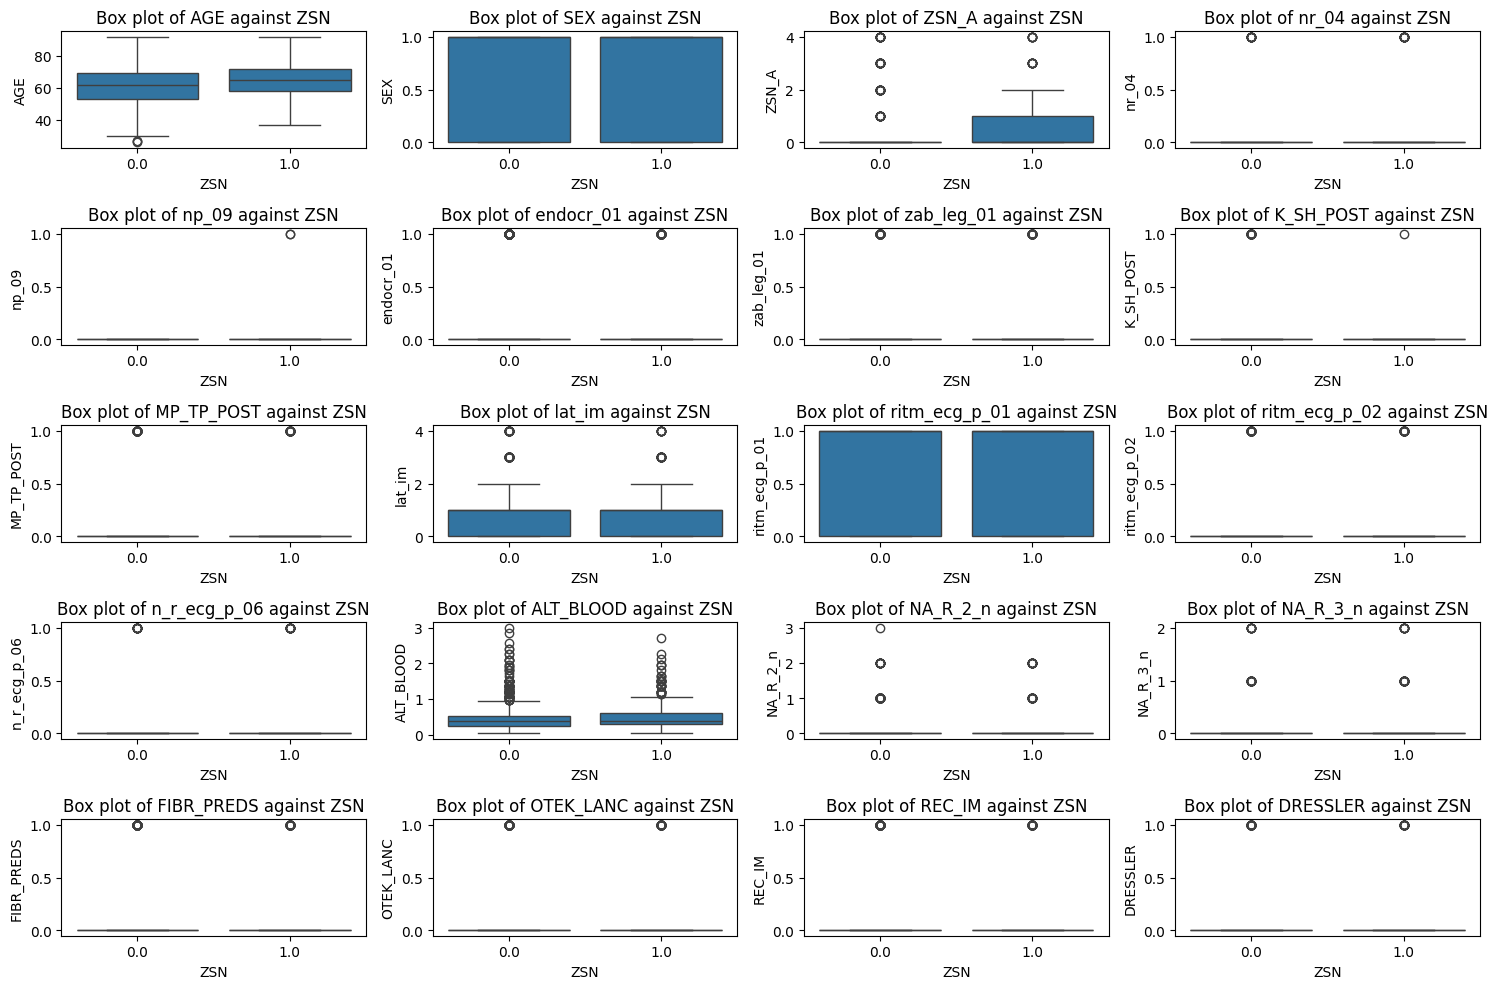

In [17]:
# Cell 14

selected_features = ['AGE', 'SEX', 'ZSN_A', 'nr_04', 'np_09', 'endocr_01', 'zab_leg_01',
                     'K_SH_POST', 'MP_TP_POST', 'lat_im', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
                     'n_r_ecg_p_06', 'ALT_BLOOD', 'NA_R_2_n', 'NA_R_3_n', 'FIBR_PREDS',
                     'OTEK_LANC', 'REC_IM', 'DRESSLER']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='ZSN', y=feature, data=data_imputed)
    plt.title(f'Box plot of {feature} against ZSN')

plt.tight_layout()
plt.show()


## **Step 2 - Identifying and Handling Outliers**

Rows with multiple outliers:
       AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
21    83.0  1.0       0.0        0.0        0.0       2.0       0.0  0.0   
26    82.0  0.0       1.0        2.0        2.0       1.0       0.0  2.0   
36    44.0  0.0       0.0        5.0        2.0       1.0       0.0  3.0   
40    73.0  0.0       0.0        3.0        2.0       1.0       0.0  2.0   
54    55.0  1.0       0.0        0.0        0.0       0.0       0.0  0.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1667  66.0  1.0       1.0        1.0        2.0       2.0       0.0  2.0   
1668  76.0  1.0       1.0        6.0        2.0       2.0       0.0  2.0   
1673  70.0  0.0       1.0        6.0        2.0       2.0       0.0  2.0   
1684  66.0  0.0       0.0        5.0        1.0       1.0       0.0  3.0   
1698  79.0  0.0       2.0        2.0        2.0       1.0       0.0  2.0   

      SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V

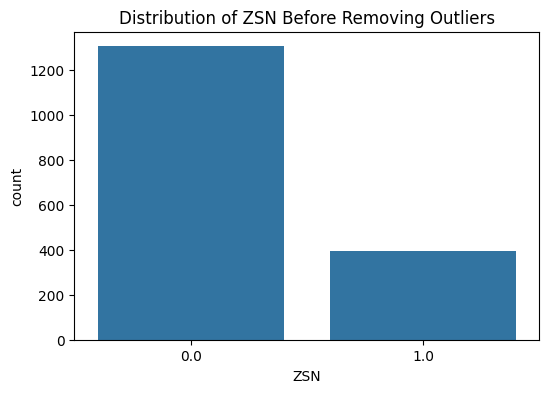

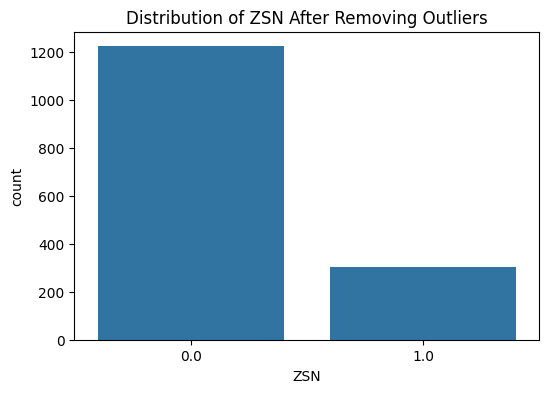

DataFrame shape before removing outliers: (1700, 123)
DataFrame shape after removing outliers: (1525, 123)


In [27]:
# Cell 15

df = data_imputed 

features_list = ['AGE', 'SEX', 'ZSN_A', 'nr_04', 'np_09', 'endocr_01', 'zab_leg_01',
       'K_SH_POST', 'MP_TP_POST', 'lat_im', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
       'n_r_ecg_p_06', 'ALT_BLOOD', 'NA_R_2_n', 'NA_R_3_n', 'FIBR_PREDS',
       'OTEK_LANC', 'REC_IM', 'DRESSLER']


def detect_multiple_outliers(df, features, threshold):
    outliers_indices = []  
    for i, row in df.iterrows():
        outlier_count = 0
        for feature in features:
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            if row[feature] < lower_bound or row[feature] > upper_bound:
                outlier_count += 1
        
        if outlier_count >= threshold:
            outliers_indices.append(i)
    
    return outliers_indices

outlier_threshold = 3  # Adjust this threshold as needed

outliers_indices = detect_multiple_outliers(df, features_list, outlier_threshold)

rows_with_multiple_outliers = df.loc[outliers_indices]
print("Rows with multiple outliers:")
print(rows_with_multiple_outliers)

df_backup = df.copy()

# Visualization before removing outliers
plt.figure(figsize=(6, 4))
sns.countplot(x='ZSN', data=df_backup)
plt.title("Distribution of ZSN Before Removing Outliers")
plt.show()

# Remove rows with multiple outliers from the DataFrame
df = df_backup.drop(outliers_indices)

# Visualization after removing outliers
plt.figure(figsize=(6, 4))
sns.countplot(x='ZSN', data=df)
plt.title("Distribution of ZSN After Removing Outliers")
plt.show()

# Check the shape of the DataFrame after removing outliers
print(f"DataFrame shape before removing outliers: {df_backup.shape}")
print(f"DataFrame shape after removing outliers: {df.shape}")


## **Step 3 - Visualize the class distribution to check for class imbalance**

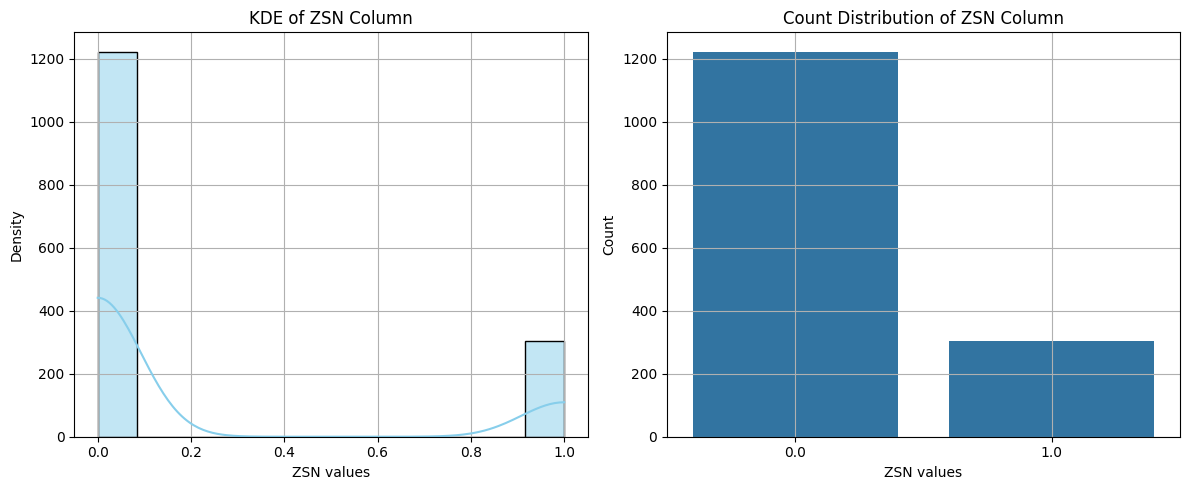

In [19]:
# Cell 16

plt.figure(figsize=(12, 5))

# KDE Plot
plt.subplot(1, 2, 1)
sns.histplot(df['ZSN'], kde=True, color='skyblue')
plt.title('KDE of ZSN Column')
plt.xlabel('ZSN values')
plt.ylabel('Density')
plt.grid(True)

# Count Distribution Plot
plt.subplot(1, 2, 2)
sns.countplot(x='ZSN', data=df)
plt.title('Count Distribution of ZSN Column')
plt.xlabel('ZSN values')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()


## **Step 4 - Output Distribution**

/var/folders/4z/x3fdrwd93cl3dn177dbwsdpw0000gn/T/ipykernel_42851/1833878141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ZSN', data=df, palette='Set2')


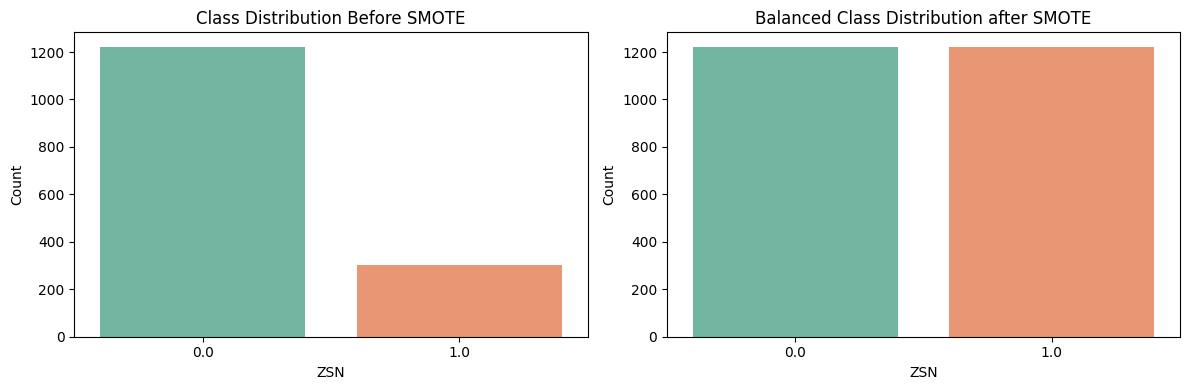

In [20]:

# Visualize the class distribution before SMOTE
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='ZSN', data=df, palette='Set2')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('ZSN')
plt.ylabel('Count')

X = df.drop('ZSN', axis=1)
y = df['ZSN']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['ZSN'])], axis=1)

# Visualize the new class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x='ZSN', data=balanced_df, hue='ZSN', legend=False, palette='Set2')
plt.title('Balanced Class Distribution after SMOTE')
plt.xlabel('ZSN')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# **Binary Classification Model Development**

## **Correct Naive Bayes algorithm**

In [21]:
class CustomGaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for c in self.classes:
            X_c = X[y == c]
            self.parameters[c] = {
                'mean': X_c.mean(axis=0),
                'var': X_c.var(axis=0),
                'prior': np.log(X_c.shape[0] / X.shape[0])
            }

    def _calculate_likelihood(self, x, mean, var):
        eps = 1e-4  # small value to avoid division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = -((x - mean) ** 2) / (2 * (var + eps))
        return coeff * np.exp(exponent)

    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = self.parameters[c]['prior']
            likelihood = self._calculate_likelihood(X, self.parameters[c]['mean'], self.parameters[c]['var'])
            posterior = np.sum(np.log(likelihood), axis=1) + prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]


In [22]:
# Cell 19

from sklearn.naive_bayes import GaussianNB  # Import GaussianNB from scikit-learn

X.columns = X.columns.astype(str)

# Instantiate the CustomGaussianNaiveBayes class
custom_model = CustomGaussianNaiveBayes()

# Instantiate the GaussianNB model from scikit-learn
sklearn_model = GaussianNB()

# Fit both models on your training data
custom_model.fit(X_resampled, y_resampled)
sklearn_model.fit(X_resampled, y_resampled)

# Predict on the test data using both models
custom_predictions = custom_model.predict(X_test)
sklearn_predictions = sklearn_model.predict(X_test)

# Calculate evaluation metrics for both models
custom_accuracy = accuracy_score(y_test, custom_predictions)
custom_precision = precision_score(y_test, custom_predictions, average='binary')
custom_recall = recall_score(y_test, custom_predictions, average='binary')
custom_f1 = f1_score(y_test, custom_predictions, average='binary')
custom_conf_mat = confusion_matrix(y_test, custom_predictions)

sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
sklearn_precision = precision_score(y_test, sklearn_predictions, average='binary')
sklearn_recall = recall_score(y_test, sklearn_predictions, average='binary')
sklearn_f1 = f1_score(y_test, sklearn_predictions, average='binary')
sklearn_conf_mat = confusion_matrix(y_test, sklearn_predictions)

# Print the metrics for both models
print("Custom Naive Bayes Metrics:")
print(f'Accuracy: {custom_accuracy}')
print(f'Precision: {custom_precision}')
print(f'Recall: {custom_recall}')
print(f'F1 Score: {custom_f1}')
print(f'Confusion Matrix:\n{custom_conf_mat}')

print("\nScikit-learn GaussianNB Metrics:")
print(f'Accuracy: {sklearn_accuracy}')
print(f'Precision: {sklearn_precision}')
print(f'Recall: {sklearn_recall}')
print(f'F1 Score: {sklearn_f1}')
print(f'Confusion Matrix:\n{sklearn_conf_mat}')


Custom Naive Bayes Metrics:
Accuracy: 0.36764705882352944
Precision: 0.2597864768683274
Recall: 0.9125
F1 Score: 0.40443213296398894
Confusion Matrix:
[[ 52 208]
 [  7  73]]

Scikit-learn GaussianNB Metrics:
Accuracy: 0.3558823529411765
Precision: 0.2611683848797251
Recall: 0.95
F1 Score: 0.4097035040431267
Confusion Matrix:
[[ 45 215]
 [  4  76]]


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


## **Step 2 - Feature Selection and Hyperparameter tuning to Optimize the model**

In [23]:
# Cell 21

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
}

# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create GridSearchCV for the resampled dataset
grid_search_resampled = GridSearchCV(gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_resampled.fit(X_resampled, y_resampled)

# Create GridSearchCV for the original dataset
grid_search_original = GridSearchCV(gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_original.fit(X, y)

# Get the best parameters and the best score for both datasets
best_params_resampled = grid_search_resampled.best_params_
best_score_resampled = grid_search_resampled.best_score_
best_params_original = grid_search_original.best_params_
best_score_original = grid_search_original.best_score_

# Use the best parameters to predict on test data for both datasets
best_gnb_resampled = grid_search_resampled.best_estimator_
predictions_resampled = best_gnb_resampled.predict(X_test)
best_gnb_original = grid_search_original.best_estimator_
predictions_original = best_gnb_original.predict(X_test)

# Evaluate the model's performance using metrics like accuracy, precision, recall, etc. for both datasets
accuracy_resampled = accuracy_score(y_test, predictions_resampled)
report_resampled = classification_report(y_test, predictions_resampled)
conf_matrix_resampled = confusion_matrix(y_test, predictions_resampled)

accuracy_original = accuracy_score(y_test, predictions_original)
report_original = classification_report(y_test, predictions_original)
conf_matrix_original = confusion_matrix(y_test, predictions_original)

# Displaying the evaluation metrics for both datasets
print("Metrics for Resampled Dataset:")
print(f"Best Parameters: {best_params_resampled}")
print(f"Best Score: {best_score_resampled}")
print(f"Accuracy: {accuracy_resampled}")
print(f"Classification Report:\n{report_resampled}")
print(f"Confusion Matrix:\n{conf_matrix_resampled}")

print("\nMetrics for Original Dataset:")
print(f"Best Parameters: {best_params_original}")
print(f"Best Score: {best_score_original}")
print(f"Accuracy: {accuracy_original}")
print(f"Classification Report:\n{report_original}")
print(f"Confusion Matrix:\n{conf_matrix_original}")


Metrics for Resampled Dataset:
Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.5368173589459923
Accuracy: 0.3558823529411765
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.17      0.29       260
         1.0       0.26      0.95      0.41        80

    accuracy                           0.36       340
   macro avg       0.59      0.56      0.35       340
weighted avg       0.76      0.36      0.32       340

Confusion Matrix:
[[ 45 215]
 [  4  76]]

Metrics for Original Dataset:
Best Parameters: {'var_smoothing': 1e-07}
Best Score: 0.2773770491803279
Accuracy: 0.37058823529411766
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.19      0.31       260
         1.0       0.27      0.96      0.42        80

    accuracy                           0.37       340
   macro avg       0.60      0.58      0.37       340
weighted avg       0.78      0.37      0.34    

# **Performance Analysis**

## **Step 1 - Accurate calculation of performance metrics (accuracy, precision, recall, F1 score)**

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics for custom_predictions
accuracy_custom = accuracy_score(y_test, custom_predictions)
precision_custom = precision_score(y_test, custom_predictions)
recall_custom = recall_score(y_test, custom_predictions)
f1_custom = f1_score(y_test, custom_predictions)
roc_auc_custom = roc_auc_score(y_test, custom_predictions)

# Calculate evaluation metrics for sklearn_predictions
accuracy_sklearn = accuracy_score(y_test, sklearn_predictions)
precision_sklearn = precision_score(y_test, sklearn_predictions)
recall_sklearn = recall_score(y_test, sklearn_predictions)
f1_sklearn = f1_score(y_test, sklearn_predictions)
roc_auc_sklearn = roc_auc_score(y_test, sklearn_predictions)

# Print the metrics for custom Naive Bayes
print("Custom Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_custom}")
print(f"Precision: {precision_custom}")
print(f"Recall: {recall_custom}")
print(f"F1 Score: {f1_custom}")
print(f"ROC AUC: {roc_auc_custom}")

# Print the metrics for sklearn's GaussianNB
print("\nSklearn's GaussianNB Metrics:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")
print(f"F1 Score: {f1_sklearn}")
print(f"ROC AUC: {roc_auc_sklearn}")


Custom Naive Bayes Metrics:
Accuracy: 0.36764705882352944
Precision: 0.2597864768683274
Recall: 0.9125
F1 Score: 0.40443213296398894
ROC AUC: 0.5562499999999999

Sklearn's GaussianNB Metrics:
Accuracy: 0.3558823529411765
Precision: 0.2611683848797251
Recall: 0.95
F1 Score: 0.4097035040431267
ROC AUC: 0.5615384615384615


## **Step 2 - Correct and insightful interpretation of the ROC curve** 

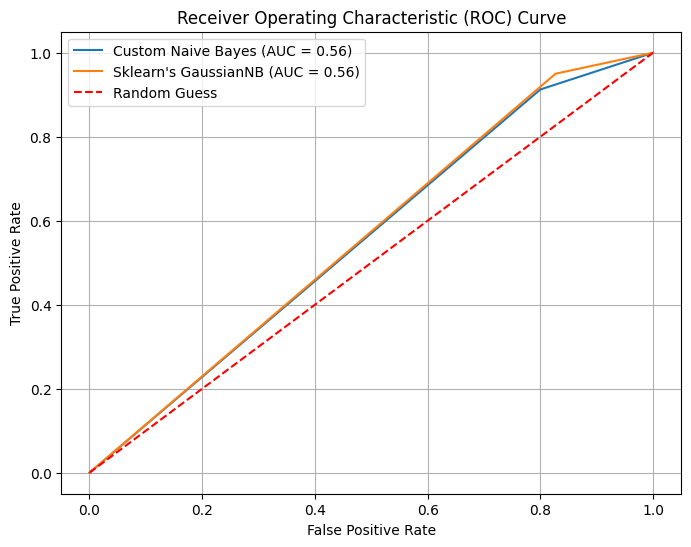

In [25]:
# Cell 23

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

fpr_custom, tpr_custom, _ = roc_curve(y_test, custom_predictions)
roc_auc_custom = auc(fpr_custom, tpr_custom)

fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, sklearn_predictions)
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_custom, tpr_custom, roc_auc_custom, 'Custom Naive Bayes')
plot_roc_curve(fpr_sklearn, tpr_sklearn, roc_auc_sklearn, "Sklearn's GaussianNB")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


## **Step 3 - Confusion Matrix**

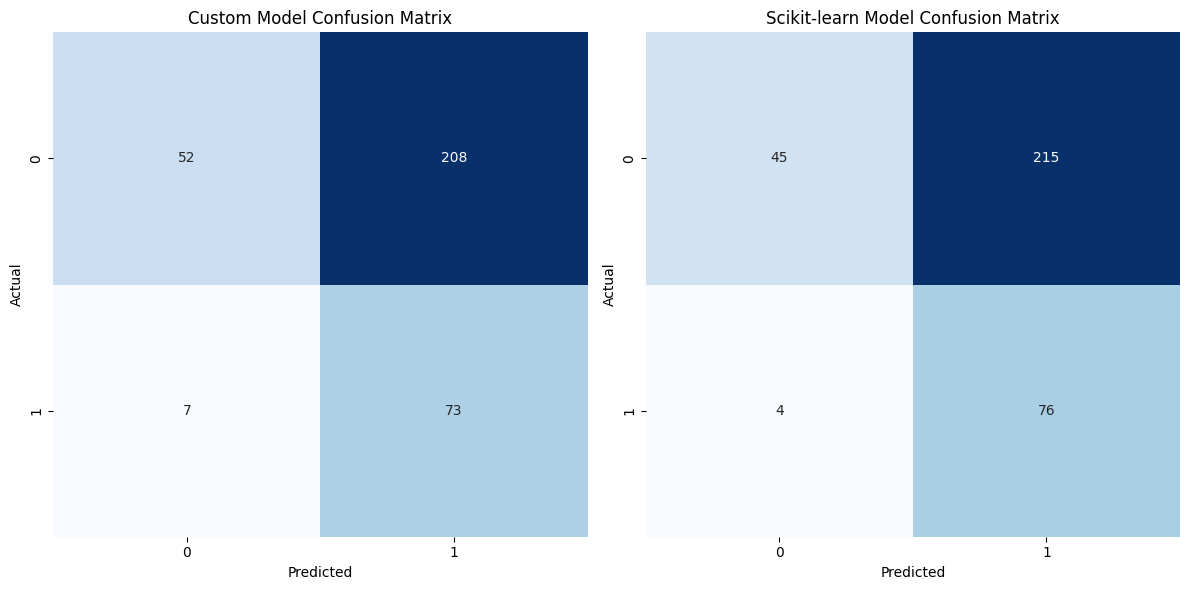

In [26]:
# Cell 24

conf_matrix_custom = confusion_matrix(y_test, custom_predictions)  
conf_matrix_sklearn = confusion_matrix(y_test, sklearn_predictions)  

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for custom model
sns.heatmap(conf_matrix_custom, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Custom Model Confusion Matrix')

# Plot confusion matrix for scikit-learn model
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Scikit-learn Model Confusion Matrix')

plt.tight_layout()
plt.show()
